# 特徴量エンジニアリング（UMAP）

In [2]:
!pip install -U pip
!pip install category_encoders
!pip install umap-learn
!git clone https://github.com/nejumi/fe_workshop.git

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
    100% |████████████████████████████████| 61kB 2.2MB/s 
    100% |████████████████████████████████| 3.2MB 7.0MB/s 
    100% |████████████████████████████████| 16.1MB 1.9MB/s 
  Running setup.py bdist_wheel for umap-learn ... - \ done
  Stored in directory: /root/.cache/pip/wheels/c8/d2/db/f154c832997dcf312484b21c7c0ba17fb415af5ba592de170c
Successfully built umap-learn


In [0]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from umap import UMAP
import category_encoders as ce

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [5]:
# collaboratoryにLendingClub50000.csvをアップロードする。
from google.colab import files
#uploaded = files.upload() # ローカルからアップロードできるが今回は使用しない。

Saving LendingClub50000.csv to LendingClub50000.csv


In [0]:
# ファイルを読み込む
df = pd.read_csv('dataset/LendingClub50000.csv')

In [7]:
df.head()

,ID,member_id,year,month,loan_amount,purpose_type,purpose_detail,title,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,bad_loan
0,1529851,1793711,2012,9,16000.0,debt_consolidation,Debt Consolidation / Final Wedding Exp,PwC,3.0,RENT,...,22.4,42.0,f,0.0,NaN,INDIVIDUAL,0.0,0.0,164787.0,False
1,1824764,2126933,2012,11,3600.0,debt_consolidation,Crush Credit Cards,Morgan Stanley Smith Barney,2.0,RENT,...,63.5,30.0,f,0.0,NaN,INDIVIDUAL,0.0,8806.0,96627.0,False
2,403548,442721,2009,5,19200.0,wedding,Consolidate debt and pay for wedding,Aggregate Knowledge,1.0,RENT,...,20.3,26.0,f,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,False
3,646411,799671,2011,1,21000.0,credit_card,Wells BofA Credit Card Refi,Emerson Process Management,1.0,RENT,...,47.6,25.0,f,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,False
4,552526,711946,2010,7,4000.0,other,Debt Consolidation,Home Depot,1.0,RENT,...,11.4,24.0,f,0.0,NaN,INDIVIDUAL,0.0,NaN,NaN,False


In [0]:
# UMAPはカテゴリ変数をそのままでは受け付けないため、年収入によるTargetエンコーディングで数値に変換しておく
df_temp = df[df.columns[2:-1]].copy()

for col in df_temp: #IDとターゲット以外のカラム
    if df_temp[col].dtype=='object' and df_temp[col].nunique()<2000: # カテゴリはTargetエンコーディングする
        te = ce.TargetEncoder()
        df_temp[col] = te.fit_transform(df_temp[[col]], df_temp[['annual_inc']])[col]
        
    if df_temp[col].dtype=='object' and df_temp[col].nunique()>=2000: # テキストはdropする
        df_temp.drop(col, axis=1, inplace=True)

In [0]:
# UMAPは欠損値を受け付けないため、中央値で埋めておく。
df_temp = df_temp.fillna(df_temp.median())

In [36]:
df_temp.head()

,year,month,loan_amount,purpose_type,emp_length,home_ownership,annual_inc,zip_code,addr_state,dti,...,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,2012,9,16000.0,67800.426841,3.0,58234.996737,90400.0,71241.633405,75177.647562,23.72,...,3946.0,22.4,42.0,69103.151496,0.0,41.0,69308.191799,0.0,0.0,164787.0
1,2012,11,3600.0,67800.426841,2.0,58234.996737,42500.0,83148.815586,79444.082366,17.34,...,10927.0,63.5,30.0,69103.151496,0.0,41.0,69308.191799,0.0,8806.0,96627.0
2,2009,5,19200.0,69243.231103,1.0,58234.996737,95000.0,78131.245356,72415.453038,7.58,...,14006.0,20.3,26.0,69103.151496,0.0,41.0,69308.191799,0.0,0.0,67163.0
3,2011,1,21000.0,68737.932374,1.0,58234.996737,85000.0,78673.977567,72415.453038,17.07,...,36280.0,47.6,25.0,69103.151496,0.0,41.0,69308.191799,0.0,0.0,67163.0
4,2010,7,4000.0,65983.306278,1.0,58234.996737,63500.0,75091.135802,69727.534377,19.50,...,595.0,11.4,24.0,69103.151496,0.0,41.0,69308.191799,0.0,0.0,67163.0


In [0]:
umap = UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')

In [0]:
embedding = umap.fit_transform(df_temp)

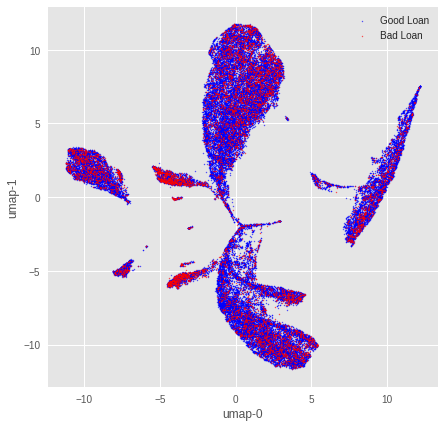

In [30]:
#  UMAPの出力を散布図で見てみよう。
plt.figure(figsize=[7,7])
plt.scatter(embedding[df.bad_loan==False][:,0], 
            embedding[df.bad_loan==False][:,1], 
            s=1, c='b', alpha=0.5, label='Good Loan')
plt.scatter(embedding[df.bad_loan==True][:,0], 
            embedding[df.bad_loan==True][:,1], 
            s=1, c='r', alpha=0.5, label='Bad Loan')
plt.xlabel('umap-0')
plt.ylabel('umap-1')
plt.legend()
plt.show()

In [0]:
# UMAPの出力を追加の特徴量として元データに追加する。
df['UMAP_0'] = embedding[:,0]
df['UMAP_1'] = embedding[:,1]

In [0]:
# csvに保存する。
df.to_csv('LendingClub50000_umap.csv', index=False)

In [0]:
# ダウンロードしたら、DataRobotでもう一度予測してみよう
files.download('LendingClub50000_umap.csv')